In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
titanic = pd.read_csv('A:\\MyCompanies\\ML classes\\DS_Batch1-main\\DS_Batch1-main\\titanic.csv')
titanic.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [12]:
titanic.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

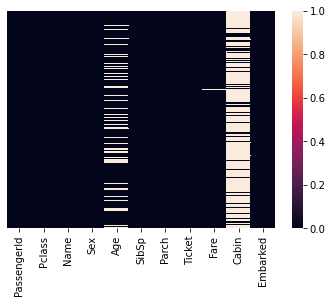

In [13]:
sns.heatmap(titanic.isnull(),yticklabels=False);

In [17]:
titanic.drop('Cabin',axis=1,inplace=True)
titanic.head()

KeyError: "['Cabin'] not found in axis"

In [20]:
mean_age = titanic.groupby('Pclass').mean()['Age']

In [21]:
mean_age

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [22]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 41
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [23]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

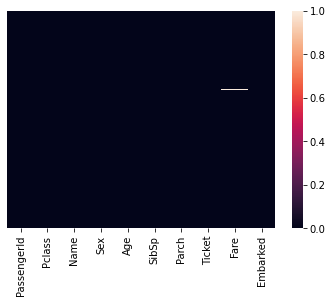

In [24]:
sns.heatmap(titanic.isnull(),yticklabels=False);

In [25]:
titanic.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [26]:
titanic.dropna(inplace=True)

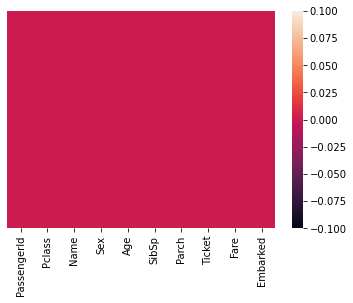

In [27]:
sns.heatmap(titanic.isnull(),yticklabels=False);

In [28]:
Sex = pd.get_dummies(titanic['Sex'])

In [29]:
Sex.head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [30]:
Embark = pd.get_dummies(titanic['Embarked'],drop_first = True)

In [31]:
Embark.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [32]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [33]:
titanic.drop(['Sex','Embarked','Name','PassengerId','Ticket'],axis=1,inplace=True)

In [34]:
titanic.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,34.5,0,0,7.8292
1,3,47.0,1,0,7.0000
2,2,62.0,0,0,9.6875
3,3,27.0,0,0,8.6625
4,3,22.0,1,1,12.2875


In [35]:
titanic = pd.concat([titanic,Sex,Embark],axis=1)
titanic.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,Q,S
0,3,34.5,0,0,7.8292,0,1,1,0
1,3,47.0,1,0,7.0000,1,0,0,1
2,2,62.0,0,0,9.6875,0,1,1,0
3,3,27.0,0,0,8.6625,0,1,0,1
4,3,22.0,1,1,12.2875,1,0,0,1


In [36]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  417 non-null    int64  
 1   Age     417 non-null    float64
 2   SibSp   417 non-null    int64  
 3   Parch   417 non-null    int64  
 4   Fare    417 non-null    float64
 5   female  417 non-null    uint8  
 6   male    417 non-null    uint8  
 7   Q       417 non-null    uint8  
 8   S       417 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 21.2 KB


ValueError: Invalid RGBA argument: 'K'

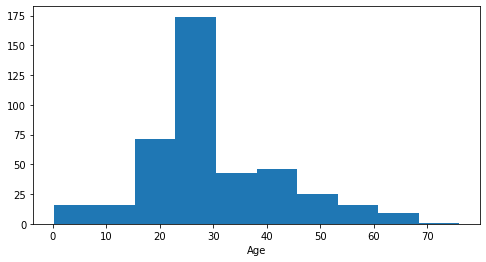

In [37]:
plt.figure(figsize=(8,4))
plt.xlabel('Age')
titanic['Age'].plot.hist(edgecolor='K').autoscale(enable=True,axis='both',tight=True);

In [38]:
titanic.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,Q,S
0,3,34.5,0,0,7.8292,0,1,1,0
1,3,47.0,1,0,7.0000,1,0,0,1
2,2,62.0,0,0,9.6875,0,1,1,0
3,3,27.0,0,0,8.6625,0,1,0,1
4,3,22.0,1,1,12.2875,1,0,0,1


ValueError: Invalid RGBA argument: 'K'

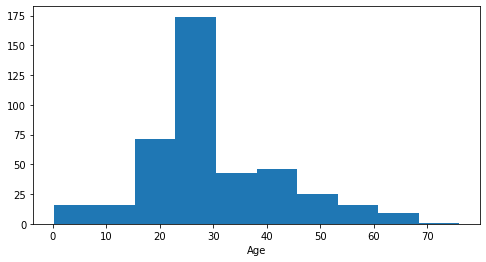

In [39]:
plt.figure(figsize=(8,4))
plt.xlabel('Age')
titanic['Age'].plot.hist(edgecolor='K').autoscale(enable=True,axis='both',tight=True);

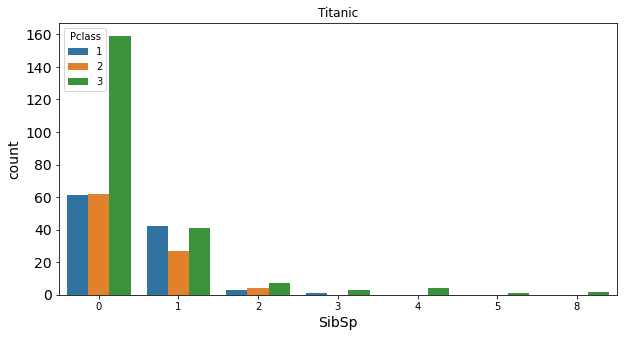

In [40]:
figure = plt.figure(figsize=(10,5));
plt.title('Titanic');
sns.countplot(x='SibSp',hue='Pclass',data=titanic);
plt.xlabel('SibSp',fontsize=14);
plt.ylabel('count',fontsize=14);
plt.yticks(fontsize=14);

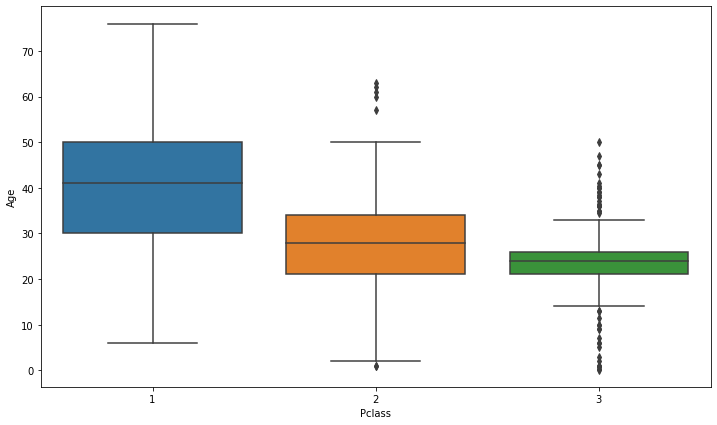

In [41]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data = titanic);